In [1]:
from QuICT.core.gate import *
from QuICT.algorithm.quantum_algorithm.random_walk import RandomWalk, Graph
from QuICT.simulation.state_vector import ConstantStateVectorSimulator

In [24]:
import matplotlib.pyplot as plt

def plot_state_hist(state):
    state = list(abs(state))
    state = [state[i].get() + state[i+1].get() for i in range(0, 16, 2)]
    plt.plot(list(range(len(state))), state, marker='o')

In [3]:
# Build Linearly Graph with different coin by vertices
vertices = 4
edges = {0: [1, 1], 1: [0, 2], 2: [1, 3], 3: [2, 2]}
coin_operators = [H.matrix, H.matrix, U2.matrix, U1.matrix]
graph_linear = Graph(vertices, edges, coin_operators)

# Build Circular Graph
vertices = 5
edges = {0: [4, 1], 1: [0, 2], 2: [1, 3], 3: [2, 4], 4: [3, 0]}
graph_circular = Graph(vertices, edges)

In [4]:
# Quantum Walk Algorithm
rw = RandomWalk(
    step=5,
    graph=graph_circular,
    coin_operator=H.matrix
)

rw_cir = rw.circuit
sim = ConstantStateVectorSimulator()
state = rw.run(sim)

[0.35355339059327084, 0.3535533905932711, 0.8838834764831881, 0.530330085889902, 0.35355339059329166, 9.69797578842592e-15, 3.904605236053911e-15, 7.2303318958703e-15]


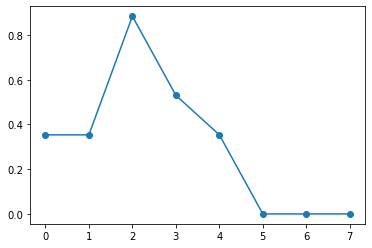

In [25]:
plot_state_hist(state)